In [83]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, sqrt, log
import scipy.constants as const
import scipy.fftpack as ft
from numpy import linalg as LA
import time
%matplotlib qt

#%% define grid and build kinetic energy and momentum operator
hbar = 1
m = 1

Ngrid = 1001
xmin = -10
xmax = 10

xvec = np.linspace(xmin,xmax,Ngrid)
dx = np.diff(xvec).mean()

x = np.mat(np.diag(xvec,0))

#first derivative as operator on the grid (->momentum operator)
dia = 0*np.ones(Ngrid)
offdiap1 = np.ones(Ngrid-1)
offdiam1 = -1*np.ones(Ngrid-1)
d1grid = np.mat(np.diag(dia,0) + np.diag(offdiam1,-1) + np.diag(offdiap1,1))/2/dx
#avoid strange things at the edge of the grid
d1grid[0,:] = 0
d1grid[Ngrid-1,:] = 0

p = hbar/1j*d1grid

#second derivative as operator on the grid (->kinetic energy)
dia = -2*np.ones(Ngrid)
offdia = np.ones(Ngrid-1)
d2grid = np.mat(np.diag(dia,0) + np.diag(offdia,-1) + np.diag(offdia,1))/dx**2
#avoid strange things at the edge of the grid
d2grid[0,:]=0
d2grid[Ngrid-1,:]=0

Ekin = -hbar**2/(2*m)*d2grid

#%%define a potential (diagonal matrix)

# =============================================================================
## potential well
width = 10
dia = 1 * np.ones(xvec.shape)
dia[np.abs(xvec) < width / 2] = 0
# =============================================================================

# =============================================================================
## potential doublewell
width_dw = 5
dia_dw = 1 * np.ones(xvec.shape)
dia_dw[np.abs(xvec) <= width_dw / 3] = 1
dia_dw[width_dw / 3 < np.abs(xvec)] = 0
dia_dw[np.abs(xvec) >= width_dw] = 1
# =============================================================================

# =============================================================================
## potential sine
dia_sin = np.sin(xvec) * np.ones(xvec.shape)
# =============================================================================

# =============================================================================
## potential hyperbolic cosine
dia_hyp = np.cosh(xvec) * np.ones(xvec.shape)
# =============================================================================

# =============================================================================
## harmonic oscillator
omega = 2*np.pi;
dia_ho = m/2*omega**2*xvec**2
# =============================================================================

#plot potential
plt.figure(2)
plt.clf()
plt.plot(xvec,dia_hyp)
plt.title('HyperbolischesPotential', size = 16)
plt.savefig('images/9/HypPotential.png')
plt.show()

#potential energy as matrix
Epot = np.mat(np.diag(dia_hyp,0))
#%% combine to Hamiltonian, diagonalize and plot the lowest 30 energy eigenvalues

H =  Ekin + Epot

w, v = LA.eig(H)
sortinds = np.argsort(w)
EigVecs = v[:,sortinds]
EigVals = w[sortinds]

# plot Eigenvalues (spectrum)
plt.figure(3)
plt.clf()
plt.plot(EigVals[0:30],'o')
plt.title('Eigenwerte', size = 16)
plt.savefig('images/9/HypPotential_EW.png')
plt.show()

#%% Show eigenfunctions (use left/right arrows to go through)
pos = 0
def key_event(e):
    global pos
    if e.key == 'right':
        pos += 1
    elif e.key == 'left':
        pos -= 1
    else:
        return
    pos = pos % EigVecs.shape[1]

    ax1.cla()
    ax1.plot(xvec,np.real(EigVecs[:,pos]))
    ax1.set(title='Realteil Eigenfunktion %d'%(pos+1),xlabel='x')

    ax2.cla()
    ax2.plot(xvec,np.power(np.abs(EigVecs[:,pos]),2))
    ax2.set(title='AbsQuadrat Eigenfunktion %d'%(pos+1),xlabel='x')

    fig.canvas.draw()

fig = plt.figure(1)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig.canvas.mpl_connect('key_press_event', key_event)

ax1.cla()
ax1.plot(xvec,np.real(EigVecs[:,pos]))
ax1.set(title='Realteil Eigenfunktion %d'%(pos+1),xlabel='x')

ax2.cla()
ax2.plot(xvec,np.power(np.abs(EigVecs[:,pos]),2))
ax2.set(title='AbsQuadrat Eigenfunktion %d'%(pos+1),xlabel='x')
plt.savefig('images/9/HypPotential_ReAbs.png')
plt.show()


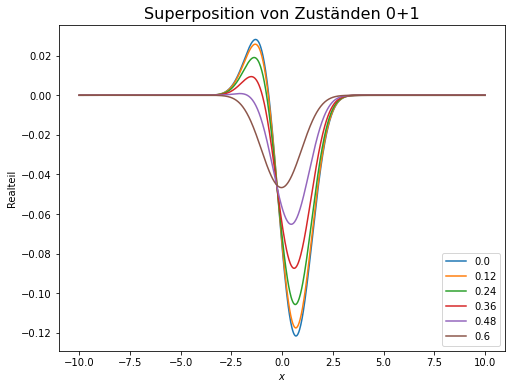

<Figure size 432x288 with 0 Axes>

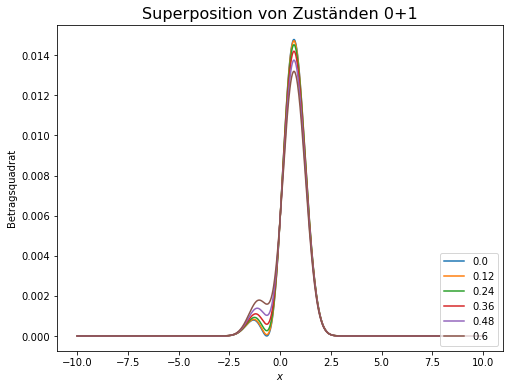

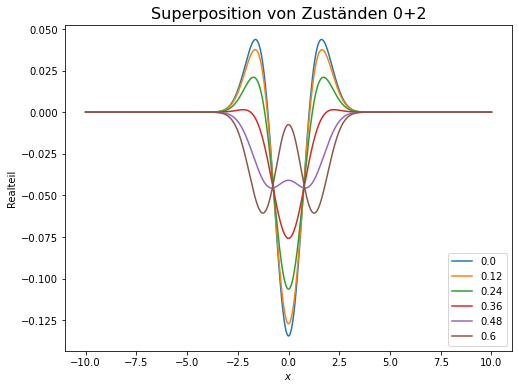

<Figure size 432x288 with 0 Axes>

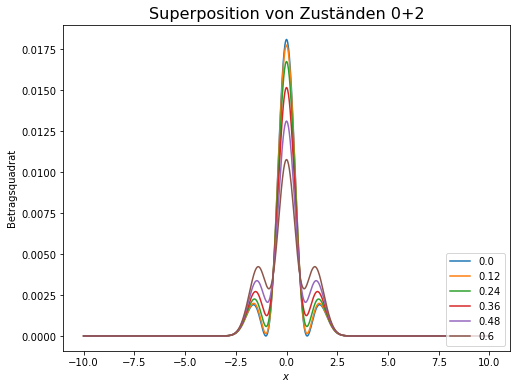

In [176]:
# Zeitevolution
%matplotlib inline

def D_t0(m):
    return 1 / sqrt(2) * (EigVecs[:,m])
w_dB = EigVals / hbar
t = np.linspace(0, .6, 6)

def zeit_ent(t, n):
    return D_t0(n) * exp(- 1j * w_dB[n] * t)



#plt.clf()
def plot_ent(m, n):
    plt.figure(figsize = (8,6))
    plt.plot(xvec, np.real(zeit_ent(t, m) + np.real(zeit_ent(t, n))))
    plt.legend(np.round(t,2) , loc = 'lower right')
    plt.title('Superposition von Zuständen ' + str(m) + '+' + str(n), size = 16)
    plt.ylabel('Realteil')
    plt.xlabel('$x$')
    plt.savefig('images/9/Sup_Re' + str(m) + str(n) + '.png')
    plt.show()
    
    plt.clf()
    plt.figure(figsize = (8,6))
    plt.plot(xvec, np.power(np.abs(zeit_ent(t, m) + zeit_ent(t, n)) ,2)) 
    plt.legend(np.round(t,2) , loc = 'lower right')
    plt.title('Superposition von Zuständen ' + str(m) + '+' + str(n), size = 16)
    plt.ylabel('Betragsquadrat')
    plt.xlabel('$x$')
    plt.savefig('images/9/Sup_Abs' + str(m) + str(n) + '.png')
    plt.show()
    

plot_ent(0,1)
plot_ent(0,2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [156]:
plt.subplot?